In [157]:
%load_ext autoreload
%autoreload 2

import re
import os
import glob
import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
directory = '/Users/bzcschae/workspace/leitmotifs/tests/results/noise'
csv_files = glob.glob(os.path.join(directory, '*.csv'))
pattern = r'[\d.]+'

def read_data():
    dataframes = []
    for file in csv_files:
        match = re.search(pattern, file)
        if match:
            extracted_number = match.group()[:-1]

            # print(f"Extracted number: {extracted_number}")
            if not extracted_number:
                extracted_number = 0

            extracted_number = float(extracted_number)*100
            if (extracted_number % 10) == 0:
                df = pd.read_csv(file, index_col=0)
                df["Noise Level"] = extracted_number
                dataframes.append(df)
    
    df = pd.concat(dataframes, ignore_index=True)
    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    df.Precision = df.Precision * 100
    df.Recall = df.Recall * 100

    return df

# df = read_data()

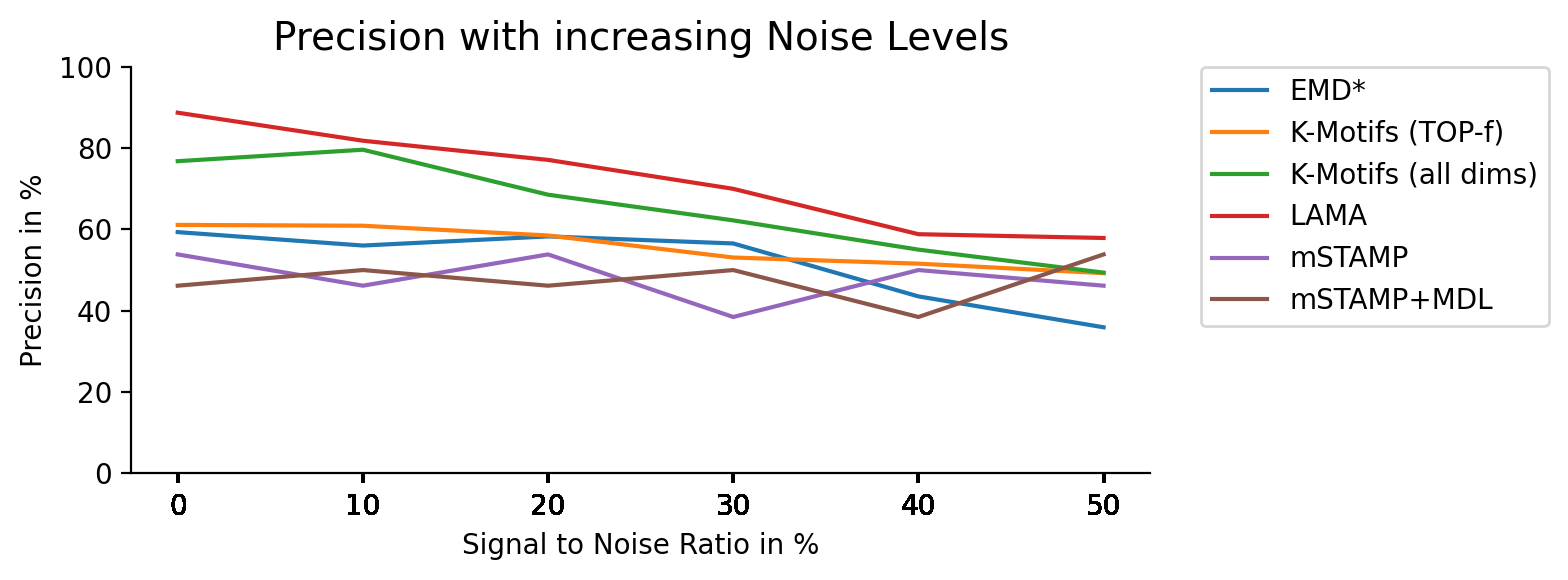

In [194]:
df = read_data()
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

# filter
with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[~df.Method.isin(with_distances)]
df = df.sort_values(by=["Method", "Noise Level"])

fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(hue=df.Method, y=df.Precision, ax=ax, x=df["Noise Level"], ci=None, estimator=np.mean,
            #order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"]
           )
ax.set_title("Precision with increasing Noise Levels", fontsize=14)
plt.xticks(df["Noise Level"])
plt.yticks(fontsize=10)
plt.ylim([0, 100])
# plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("Signal to Noise Ratio in %")
plt.ylabel("Precision in %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision.pdf")

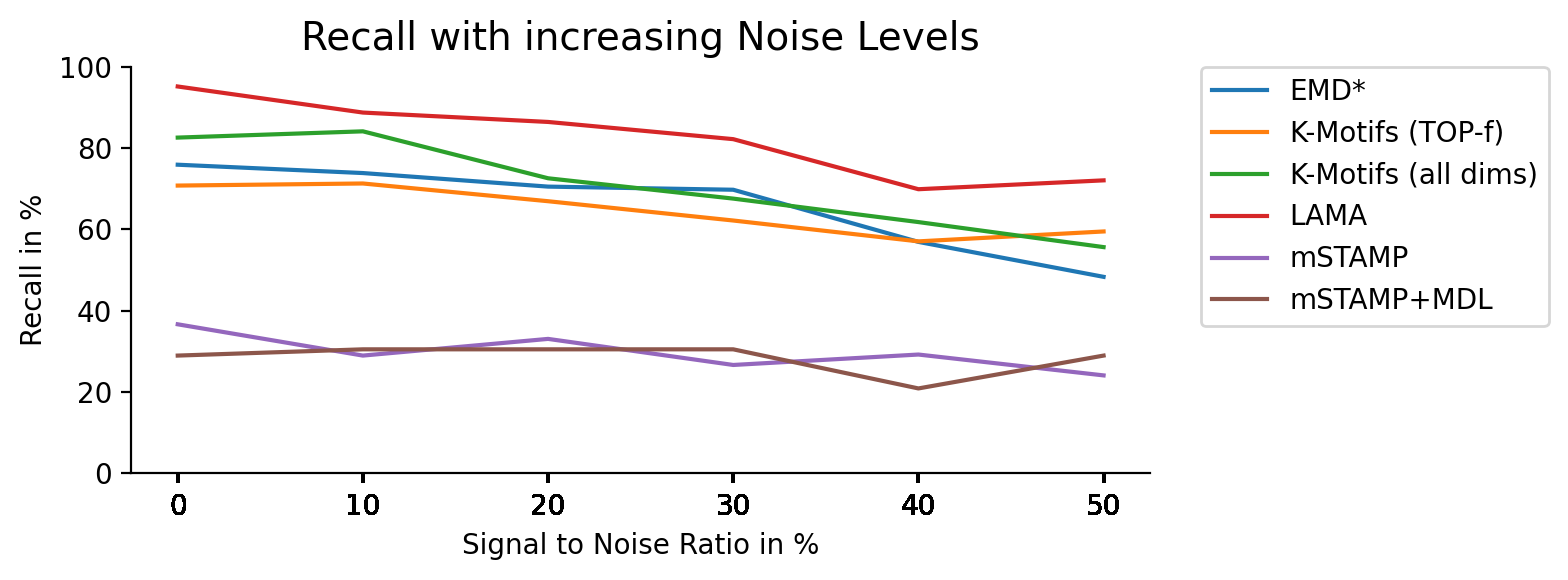

In [193]:
fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(hue=df.Method, y=df.Recall, ax=ax, x=df["Noise Level"], ci=None, estimator=np.mean,
            #order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"]
            )
ax.set_title("Recall with increasing Noise Levels", fontsize=14)
plt.xticks(df["Noise Level"])

plt.yticks(fontsize=10)
plt.ylim([0, 100])
# plt.xticks(rotation=-10, fontsize=10, ha='left')
plt.xlabel("Signal to Noise Ratio in %")
plt.ylabel("Recall in %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall.pdf")

In [152]:
df.groupby([df.Method, df["Noise Level"]])[["Precision", "Recall"]].agg(["mean"])

Precision    Recall
                                     mean      mean
Method              Noise Level                    
EMD*                0.0          0.593269  0.758974
                    35.0         0.426603  0.541026
                    40.0         0.435256  0.569231
                    45.0         0.416346  0.530769
                    50.0         0.359295  0.483333
K-Motifs (TOP-f)    0.0          0.610989  0.707692
                    35.0         0.547339  0.639744
                    40.0         0.515705  0.570513
                    45.0         0.496154  0.538462
                    50.0         0.492363  0.594872
K-Motifs (all dims) 0.0          0.767628  0.825641
                    35.0         0.605018  0.744872
                    40.0         0.550199  0.617949
                    45.0         0.567366  0.671795
                    50.0         0.493688  0.556410
LAMA                0.0          0.886859  0.951282
                    35.0         0.559936  0.688462
                    40.0         0.588141  0.698718
                    45.0         0.558654  0.693590
                    50.0         0.578846  0.720513
mSTAMP              0.0          0.538462  0.366667
                    35.0         0.384615  0.208974
                    40.0         0.500000  0.292308
                    45.0         0.500000  0.305128
                    50.0         0.461538  0.241026
mSTAMP+MDL          0.0          0.461538  0.289744
                    35.0         0.500000  0.305128
                    40.0         0.384615  0.208974
                    45.0         0.461538  0.219231
                    50.0         0.538462  0.289744

In [138]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 0.456303 & 0.500000 & 0.591026 & 0.750000 \\
K-Motifs (TOP-f) & 0.533169 & 0.500000 & 0.613675 & 0.600000 \\
K-Motifs (all dims) & 0.609561 & 0.700000 & 0.684615 & 1.000000 \\
LAMA & 0.674786 & 0.750000 & 0.788462 & 1.000000 \\
mSTAMP & 0.500000 & 0.500000 & 0.304274 & 0.200000 \\
mSTAMP+MDL & 0.487179 & 0.500000 & 0.266239 & 0.200000 \\
\bottomrule
\end{tabular}



In [49]:
print(df.groupby([df.Method, df["Noise Level"]])[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

|                                 |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:--------------------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| ('EMD*', '0.05')                |                0.567628 |                  0.6      |             0.733333 |               0.8      |
| ('EMD*', '0.1')                 |                0.608654 |                  0.666667 |             0.748718 |               0.8      |
| ('EMD*', '0.15')                |                0.593269 |                  0.65     |             0.733333 |               0.8      |
| ('EMD*', '0.2')                 |                0.593269 |                  0.65     |             0.733333 |               0.8      |
| ('EMD*', '0.25')                |                0.593269 |                  0.65     |             0.733333 |               0.8      |
| ('K-Motifs (TOP-f)', '0.05')    